In [ ]:
!unrar x "/content/drive/MyDrive/image.rar"



# New Section

In [ ]:
import numpy as np
import scipy.io as sio
import dlib
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from imutils import face_utils
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pickle


In [ ]:
def get_list_from_filenames(file_path):
    # input:    relative path to .mat file with file names
    # output:   list of relative path names

    lines = [Path(f).stem for f in glob.glob(file_path)]
    return lines

In [ ]:
def read_path(path):
    
    mat = sio.loadmat(path)
    # print(mat)
    landmarks = mat['pt2d']
    pt3d=mat['pt2d']
    # print(pt3d.shape)
    pre_pose_params = mat['Pose_Para'][0]
    # Get [pitch, yaw, roll]
    pose_params = pre_pose_params[:3]
    return pt3d, pose_params

In [ ]:


class AFLW2000():
    def __init__(self, data_dir,file_path, img_ext='.jpg', annot_ext='.mat', image_mode='RGB'):
        self.data_dir = data_dir
        self.file_path = file_path
        self.img_ext = img_ext
        self.annot_ext = annot_ext

        filename_list = get_list_from_filenames(data_dir)
        filename_list.sort()
        
        self.X_train = filename_list
        self.y_train = filename_list
        self.image_mode = image_mode
        self.length = len(filename_list)

    def __getitem__(self, index):
      
        mat_path = os.path.join(self.file_path,self.y_train[index] + self.annot_ext)

        pt3d,pose = read_path(mat_path)
        X=pt3d[0]
        Y=pt3d[1]

        pitch = pose[0]
        yaw = pose[1]
        roll = pose[2]

        return pt3d,X,Y,pitch, yaw, roll 

    def __len__(self):
        # 2,000
        return self.length

In [ ]:
demo=AFLW2000("/content/image/*.mat",'/content/image/')

In [ ]:
l=demo.__len__()
landmarks_x = ['x' + str(i) for i in range(68)]
landmarks_y = ['y' + str(i) for i in range(68)]
features = landmarks_x + landmarks_y
labels = ['pitch', 'yaw', 'roll']
df = pd.DataFrame(columns = features + labels)

for i in range(l):
    pla=demo.__getitem__(i)
    landmarks=pla[0]
    x=pla[1]
    y=pla[2]
    p=pla[3]
    ya=pla[4]
    r=pla[5]
    featuress=landmarks[0:2].reshape(1, -1)
    row = np.append(featuress, [p, ya, r]).reshape(1, -1)
    df2 =pd.DataFrame(row, columns = features + labels)
    df = df.append(df2)
     

In [ ]:
df[features]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,137.156428,137.830934,139.467255,141.279452,141.845711,148.380614,158.557841,182.446123,213.561180,249.319901,...,340.233328,335.507909,328.212727,323.610026,323.315682,323.864538,332.131449,327.549283,328.713911,326.593151
0,137.520039,137.067240,139.170004,144.004460,156.527892,172.574004,191.335762,208.944920,224.820220,238.567640,...,336.541809,333.759129,324.181775,317.226411,318.194654,318.424150,328.860198,330.260298,330.569219,328.386203
0,136.692121,142.459660,149.636518,156.871612,167.289763,187.537653,208.031410,232.661122,254.746258,272.881311,...,328.411225,324.589953,318.827068,307.766649,308.413511,310.826352,323.993596,322.159797,321.714763,320.051381
0,139.402934,137.137072,137.869077,142.290540,148.955175,158.868286,173.000984,189.719274,210.634210,231.768461,...,326.097884,324.726275,323.735874,318.233333,318.866043,319.636823,327.293730,319.636823,318.866043,318.233333
0,152.363532,148.395796,147.101928,145.545693,144.960987,149.733557,158.419122,169.856264,186.146577,210.054776,...,342.796171,338.116753,325.847738,328.134886,328.810181,330.997219,341.828855,338.271321,336.162770,333.362086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,137.477922,140.322587,145.004330,151.406677,157.410661,166.953803,183.937669,201.824484,228.487234,254.215693,...,346.130391,343.169155,336.578002,334.504095,335.283158,332.768541,328.037343,332.768541,335.283158,334.504095
0,137.212308,138.417467,147.193430,149.082307,155.515616,165.400751,177.007272,186.563665,209.033253,234.349085,...,340.356463,336.656086,329.484845,329.326186,330.290313,327.873910,323.472378,327.873910,330.290313,329.326186
0,139.306397,140.661847,144.058214,150.270052,161.539585,182.756261,207.843797,224.719158,245.786749,261.630053,...,340.349265,330.817248,308.982878,308.768863,310.063691,308.229620,308.769878,326.542869,328.907638,329.180412
0,136.644660,144.185406,153.634062,166.538750,176.892116,191.307446,214.485980,242.892889,264.242263,283.947499,...,345.405353,348.538902,338.961125,337.211476,334.937656,328.739694,319.174212,328.739694,334.937656,337.211476


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels], test_size=0.2, random_state=42)
# split y_train into pitch, yaw, roll
y_train_pitch = y_train['pitch']
y_train_yaw = y_train['yaw']
y_train_roll = y_train['roll']
# split y_test into pitch, yaw, roll
y_test_pitch = y_test['pitch']
y_test_yaw = y_test['yaw']
y_test_roll = y_test['roll']

# model1 = Ridge(alpha = 0.1).fit(X_train, y_train_pitch)
model1= Lasso(alpha = 0.001).fit(X_train, y_train_pitch)
model2= Lasso(alpha = 0.001).fit(X_train, y_train_yaw)
model3= Lasso(alpha = 0.001).fit(X_train, y_train_roll)
# model1=LinearRegression().fit(X_train, y_train_pitch)
# model1=SVR(kernel='linear', C=1).fit(X_train, y_train_pitch)
# model1=RandomForestRegressor(random_state=0, n_estimators=5, max_depth=10).fit(X_train, y_train_pitch)
# model1=DecisionTreeRegressor(max_depth=5).fit(X_train, y_train_pitch)


In [ ]:
y_pred_pitch = model1.predict(X_test)
y_pred_yaw = model2.predict(X_test)
y_pred_roll = model3.predict(X_test)

In [ ]:
y_test_pitch

0   -0.156095
0   -0.161890
0   -0.160897
0   -0.195635
0    0.055647
       ...   
0   -0.048814
0    0.144102
0   -0.006241
0   -0.375807
0   -0.248568
Name: pitch, Length: 768, dtype: float64

##Test accurcy for model

In [ ]:
print('Pitch:')
print('Mean Squared Error for train :', mean_squared_error(y_train_pitch, model1.predict(X_train)))
print('Mean Squared Error for test train :', mean_squared_error(y_test_pitch, y_pred_pitch))
print('R2 Score for train:', r2_score(y_train_pitch, model1.predict(X_train)))
print('R2 Score for test:', r2_score(y_test_pitch, y_pred_pitch))


print("\n Yaw:")
print('Mean Squared Error for train:', mean_squared_error(y_train_yaw, model2.predict(X_train)))
print('Mean Squared Error for test:', mean_squared_error(y_test_yaw, y_pred_yaw))
print('R2 Score for train:', r2_score(y_train_yaw, model2.predict(X_train)))
print('R2 Score for test:', r2_score(y_test_yaw, y_pred_yaw))


print("\n Roll:")
print('Mean Squared Error for train:', mean_squared_error(y_train_roll, model3.predict(X_train)))
print('Mean Squared Error for test:', mean_squared_error(y_test_roll, y_pred_roll))
print('R2 Score for train:', r2_score(y_train_roll, model3.predict(X_train)))
print('R2 Score for test:', r2_score(y_test_roll, y_pred_roll))


Pitch:
Mean Squared Error for train : 0.0017454283352962272
Mean Squared Error for test train : 0.0020931344170871343
R2 Score for train: 0.9351787487201967
R2 Score for test: 0.9291878911975523

 Yaw:
Mean Squared Error for train: 0.0008558944389306856
Mean Squared Error for test: 0.0009166173181428639
R2 Score for train: 0.9894284303573492
R2 Score for test: 0.9889370970360272

 Roll:
Mean Squared Error for train: 0.00042006039793634337
Mean Squared Error for test: 0.0005173430880192198
R2 Score for train: 0.9804030894492513
R2 Score for test: 0.9791468992135675


In [ ]:
dfh = pd.DataFrame({'Actual_P': y_test_pitch,'Predicted_P': y_pred_pitch
                    ,'Actual_Y': y_test_yaw, 'Predicted_Y':y_pred_yaw,
                    'Actual_R': y_test_roll, 'Predicted_R': y_pred_roll})
dfh

,Actual_P,Predicted_P,Actual_Y,Predicted_Y,Actual_R,Predicted_R
0,-0.156095,-0.119573,0.134771,0.136796,-0.103571,-0.082109
0,-0.161890,-0.150581,-0.040835,-0.037711,-0.025590,-0.019738
0,-0.160897,-0.099812,0.392026,0.372608,-0.171145,-0.158386
0,-0.195635,-0.180741,0.410478,0.451437,-0.121162,-0.162890
0,0.055647,0.020054,-0.511207,-0.515113,-0.070894,-0.060392
...,...,...,...,...,...,...
0,-0.048814,-0.047788,-0.247100,-0.262238,-0.055794,-0.045677
0,0.144102,0.140792,0.152360,0.177135,-0.131090,-0.144153
0,-0.006241,0.001745,0.231483,0.232923,-0.157728,-0.166832
0,-0.375807,-0.275886,-0.430160,-0.384023,0.379652,0.382868


In [ ]:

def draw_axis(img, pitch, yaw, roll, tdx=None, tdy=None, size = 100):

    # pitch = pitch * np.pi / 180
    # yaw = (yaw * np.pi / 180)
    # roll = roll * np.pi / 180
    
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-06-17 18:43:32--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   111MB/s    in 0.6s    

2022-06-17 18:43:32 (111 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:


!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2022-06-17 18:43:34--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.109.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2022-06-17 18:43:34--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.110.153, 185.199.109.153, 185.199.111.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.006s  

2022-06-17 18:43:34 (108 MB/s) - ‘mmod_human_face_detec

In [ ]:

!bzip2 -d  '/content/shape_predictor_68_face_landmarks.dat.bz2'

In [ ]:
predictor=dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()
cnn_face_detector

In [ ]:
def read_path2(path):
    
    mat = sio.loadmat(path)
    # print(mat)
    landmarks = mat['pt2d']
    pt3d=mat['pt2d']
    # print(pt3d.shape)
    pre_pose_params = mat['Pose_Para'][0]
    # Get [pitch, yaw, roll]
    pose_params = pre_pose_params[:3]
    labels = mat['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    pitch_, yaw_, roll_ = pitch, -yaw, roll
    return pt3d,pitch_, yaw_, roll_


In [ ]:
random_path = random.choice(get_list_from_filenames("/content/image/*.mat"))
random_path2 = random.choice(get_list_from_filenames("/content/drive/MyDrive/imageML/*.jpg"))
s='109209934_1'

# image='/content/image/'+random_path+'.jpg'
# path='/content/image/'+random_path+'.mat'

image='/content/image/'+s+'.jpg'
path='/content/image/'+s+'.mat'

# image='/content/drive/MyDrive/imageML/'+random_path2+'.jpg'
# image='/content/drive/MyDrive/imageML/'+s+'.jpg'





0.09447552263736725
-0.08981851
-0.04519023


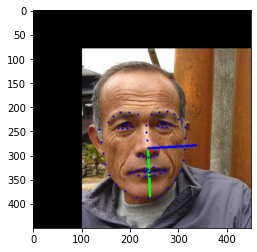

In [ ]:

frame = cv2.imread(image)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
dets = cnn_face_detector(cv2_frame, 1)

def show_image(path):
    for (idx, det) in enumerate(dets):
        
            landm, pose = read_path(path)

            pitch = pose[0] #* 180 / np.pi
            yaw = pose[1] #*180 / np.pi
            roll = pose[2] #* 180 / np.pi

            shape = predictor(cv2_frame, det)
            shape1 = face_utils.shape_to_np(shape)
            tdx,tdy=shape.part(30).x, shape.part(30).y
            print(yaw*-1)
            print(pitch)
            print(roll)
            for (x,y) in shape1:
                plt.plot(x,y,'bo', markersize=1)
    plt.imshow(draw_axis(frame, pitch, -yaw, roll,tdx,tdy))
    plt.show()
           
       
       
show_image(path)




In [ ]:

for (idx, det) in enumerate(dets):
              
            shape = predictor(cv2_frame, det)
            shape1 = face_utils.shape_to_np(shape)
            tdx,tdy=shape.part(30).x, shape.part(30).y
       
            a=shape1.reshape(1, -1)
            landmarks_x = ['x' + str(i) for i in range(68)]
            landmarks_y = ['y' + str(i) for i in range(68)]
            f = landmarks_x + landmarks_y
            df = pd.DataFrame(a, columns = f)
           
            p=model1.predict(df)
            # p=p* 180 / np.pi
            ya=model2.predict(df)
            # ya=ya* 180 / np.pi
            r=model3.predict(df)
            # r=r* 180 / np.pi
          
            print(p)
            print(ya)
            print(r)

            # cv2_imshow(draw_axis(frame,p,-ya,r,tdx,tdy))

[-0.61860144]
[0.29842596]
[0.34115099]


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:

pa='photo.jpg'
detector = dlib.get_frontal_face_detector()

def show_land(filename,outputfile='out0.jpg'):
      capture = cv2.VideoCapture(filename)
      ret, frame = capture.read()
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      # gray = cv2.resize(gray,(450,450))
      # print(gray.shape)
      rects = detector(gray, 1)
      # plt.imshow(gray)
      # rbg = frame[:,:,::-1]

      # store the landmarks in a numpy array
      # landmarks = np.zeros((68, 2), dtype=int)

      for (i, rect) in enumerate(rects):
          shape = predictor(gray, rect)
          shape1 = face_utils.shape_to_np(shape)
          # print(shape1)
          landmarks = shape1.T
          nose_x, nose_y = landmarks[0,32], landmarks[1,32]
          # print(landmarks)
          tdx,tdy=shape.part(30).x, shape.part(32).y
          a=shape1.reshape(1, -1)
          landmarks_x = ['x' + str(i) for i in range(68)]
          landmarks_y = ['y' + str(i) for i in range(68)]
          f = landmarks_x + landmarks_y
          df = pd.DataFrame(a, columns = f)
          p=model1.predict(df)
          # p=p* 180 / np.pi
          ya=model2.predict(df)
          # ya=ya* 180 / np.pi
          r=model3.predict(df)
          # r=r* 180 / np.pi
          cv2_imshow(draw_axis(frame,p,-ya,r,tdx,tdy))
       
          # count=random.randint(0, 9)
          # print(count)
        
          cv2.imwrite(outputfile, draw_axis(frame,p,-ya,r,tdx,tdy)) 
          # cv2_imshow(draw_axis(frame,p,-ya,r,nose_x,nose_y))
          # plt.imshow(draw_axis(gray,p,-ya,r, nose_x, nose_y))
          # vidcap = cv2.VideoCapture('test.mp4')
          # success,image = vidcap.read()
          # count = 0
          # while success:
          #   cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
          #   success,image = vidcap.read()
          #   iname='frame'+str(count)+'.jpg'
          #   show_land(iname)
          #   print(iname)

          #   print('Read a new frame: ', success)
          #   count += 1



    # print(shape.shape)
    # print(shape)
    
    # for (x,y) in shape1:
    #             plt.plot(x,y,'bo', markersize=1)
# shape = predictor(cv2_frame, det)
# shape1 = face_utils.shape_to_np(shape)
# tdx,tdy=shape.part(30).x, shape.part(30).y
# a=shape1.reshape(1, -1)
# landmarks_x = ['x' + str(i) for i in range(68)]
# landmarks_y = ['y' + str(i) for i in range(68)]
# f = landmarks_x + landmarks_y
# df = pd.DataFrame(a, columns = f)


# landmarks = shape.T
# print(landmarks.shape)
# print(landmarks)
# nose_x, nose_y = landmarks[0,32], landmarks[1,32]
# print(nose_x, nose_y)
# landmarks_ = landmarks.reshape(1, -1)
# pitch_pred = model1.predict(landmarks_)
# yaw_pred = model2.predict(landmarks_)
# roll_pred = model3.predict(landmarks_)
# plt.imshow(draw_axis(gray, yaw_pred, pitch_pred, roll_pred, nose_x, nose_y))
# plt.show()

In [ ]:
show_land(filename)

In [ ]:
# Adapted from: https://stackoverflow.com/a/62804023/4879610
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab, 
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;

      // from https://stackoverflow.com/questions/62529304/is-there-any-way-to-capture-live-video-using-webcam-in-google-colab#comment114644726_62804023
      video.muted = true;

      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has 
      // been successfully started. Since this is async, the function will be 
      // paused until this has started playing. 
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);

    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  # show saved video in colab.
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
# video_path = "test.mp4"
video_path="/content/drive/MyDrive/MLProject/Inputvideo/vedio1.mp4"
# record_video(video_path)

In [ ]:
# show_video(video_path)

In [ ]:
!pip install cmake
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=2a4d4794c1f11035ba8db9f4acf91c31c0af69ec63113e68b177a94c6fe4366b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
video_capture = cv2.VideoCapture("test.mp4")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        print(frame.shape)
        rects = detector(frame, 1)
        for (i, rect) in enumerate(rects):
                shape = predictor(frame, rect)
                shape1 = face_utils.shape_to_np(shape)
                landmarks = shape1.T
                nose_x, nose_y = landmarks[0,32], landmarks[1,32]
                print(landmarks)
                tdx,tdy=shape.part(30).x, shape.part(30).y
                a=shape1.reshape(1, -1)
                landmarks_x = ['x' + str(i) for i in range(68)]
                landmarks_y = ['y' + str(i) for i in range(68)]
                f = landmarks_x + landmarks_y
                df = pd.DataFrame(a, columns = f)
                p=model1.predict(df)
                # p=p* 180 / np.pi
                ya=model2.predict(df)
                # ya=ya* 180 / np.pi
                r=model3.predict(df)
                # r=r* 180 / np.pi
                # cv2_imshow(draw_axis(frame,p,-ya,r,tdx,tdy))
                # cv2_imshow(draw_axis(frame,p,-ya,r,nose_x,nose_y))
                plt.imshow(draw_axis(frame,p,ya,r, nose_x, nose_y))
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)

In [ ]:
vidcap = cv2.VideoCapture('/content/drive/MyDrive/MLProject/Inputvideo/vedio1.mp4')
success,image = vidcap.read()
count = 0

while success:
  cv2.imwrite("/content/drive/MyDrive/MLProject/frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  iname='/content/drive/MyDrive/MLProject/frames/frame'+str(count)+'.jpg'
  out='/content/drive/MyDrive/MLProject/outputframes/frame'+str(count)+'.jpg'
  show_land(iname,out)
  print(iname)

  # print('Read a new frame: ', success)
  count += 1

In [ ]:
# frameSize = (500, 500)
# c=0

# out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 50, frameSize)
# # /content/outimage0.jpg
# for filename in glob.glob('frame[^0-9][^0-9][^0-9].jpg'):
#     img = cv2.imread(filename)
#     c+=1
#     print(filename)
#     out.write(img)

# out.release()
# print(c)

In [ ]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from natsort import natsorted

# ima= natsorted(image_files)
# print(ima)

In [ ]:

import os
import moviepy.video.io.ImageSequenceClip
image_folder='/content/drive/MyDrive/MLProject/outputframes/'

fps=20
# /content/outimage0.jpg


image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               
               if img.endswith(".jpg")]
image_files= natsorted(image_files)        
print(image_files)        
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('/content/drive/MyDrive/MLProject/outputvideo/my_video_dlib.mp4')

['/content/drive/MyDrive/MLProject/outputframes/frame0.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame1.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame2.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame3.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame4.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame5.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame6.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame7.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame8.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame9.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame10.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame11.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame12.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame13.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame14.jpg', '/content/drive/MyDrive/MLProject/outputframes/frame15.jpg', '/content/drive/MyDrive/MLProject

100%|██████████| 611/611 [00:09<00:00, 62.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/MLProject/outputvideo/my_video_dlib.mp4 

